In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Linear_Regression_Project\Melbourne_housing_FULL.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.500,3067.000,...,1.000,1.000,126.000,nan,nan,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,...,1.000,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,...,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.500,3067.000,...,2.000,1.000,0.000,nan,nan,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
5,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,4/03/2017,2.500,3067.000,...,2.000,1.000,94.000,nan,nan,Yarra City Council,-37.797,144.997,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,...,1.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
7,Abbotsford,16 Maugie St,4,h,nan,SN,Nelson,6/08/2016,2.500,3067.000,...,2.000,2.000,400.000,220.000,2006.000,Yarra City Council,-37.797,144.996,Northern Metropolitan,4019.000
8,Abbotsford,53 Turner St,2,h,nan,S,Biggin,6/08/2016,2.500,3067.000,...,1.000,2.000,201.000,nan,1900.000,Yarra City Council,-37.800,144.997,Northern Metropolitan,4019.000
9,Abbotsford,99 Turner St,2,h,nan,S,Collins,6/08/2016,2.500,3067.000,...,2.000,1.000,202.000,nan,1900.000,Yarra City Council,-37.800,144.999,Northern Metropolitan,4019.000


In [3]:
print(data.shape) #number of rows and columns

(34857, 21)


In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.500,3067.000,...,1.000,1.000,126.000,nan,nan,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,...,1.000,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,...,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.500,3067.000,...,2.000,1.000,0.000,nan,nan,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [5]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
data.info()  # View data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [7]:
print(data.select_dtypes(['object']).columns)  #identify object columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [8]:
#convert object to categorical variables
obj_cat = ['Suburb','Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in obj_cat:
    data[colname] = data[colname].astype('category')

In [9]:
data['Date'] = pd.to_datetime(data['Date'])  # convert Date to date object

In [10]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000,27247.000,34856.000,34856.000,26640.000,26631.000,26129.000,23047.000,13742.000,15551.000,26881.000,26881.000,34854.000
mean,3.031,1050173.345,11.185,3116.063,3.085,1.625,1.729,593.599,160.256,1965.290,-37.811,145.002,7572.888
std,0.970,641467.130,6.789,109.024,0.981,0.724,1.011,3398.842,401.267,37.328,0.090,0.120,4428.090
min,1.000,85000.000,0.000,3000.000,0.000,0.000,0.000,0.000,0.000,1196.000,-38.190,144.424,83.000
25%,2.000,635000.000,6.400,3051.000,2.000,1.000,1.000,224.000,102.000,1940.000,-37.863,144.934,4385.000
50%,3.000,870000.000,10.300,3103.000,3.000,2.000,2.000,521.000,136.000,1970.000,-37.808,145.008,6763.000
75%,4.000,1295000.000,14.000,3156.000,4.000,2.000,2.000,670.000,188.000,2000.000,-37.754,145.072,10412.000
max,16.000,11200000.000,48.100,3978.000,30.000,12.000,26.000,433014.000,44515.000,2106.000,-37.390,145.526,21650.000


In [11]:
num_cat = ['Postcode']  #convert numeric variables to categorical

for colname in num_cat:
    data[colname] = data[colname].astype('category')   

In [12]:
data.info()  #confirm changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1)

In [13]:
data['Diference'] = data['Rooms'] - data['Bedroom2'] # here process for checking Duplicate values in both columns. 
                                                     #The differences between these variables are minimal so keeping both would only be duplicating information. 
                                                     #The Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.
data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Diference
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,2016-03-09,2.500,3067.000,...,1.000,126.000,nan,nan,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000,0.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-03-12,2.500,3067.000,...,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000,0.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-04-02,2.500,3067.000,...,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000,0.000
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,2016-04-02,2.500,3067.000,...,1.000,0.000,nan,nan,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000,0.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-04-03,2.500,3067.000,...,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000,0.000
5,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-04-03,2.500,3067.000,...,1.000,94.000,nan,nan,Yarra City Council,-37.797,144.997,Northern Metropolitan,4019.000,0.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-04-06,2.500,3067.000,...,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000,1.000
7,Abbotsford,16 Maugie St,4,h,nan,SN,Nelson,2016-06-08,2.500,3067.000,...,2.000,400.000,220.000,2006.000,Yarra City Council,-37.797,144.996,Northern Metropolitan,4019.000,1.000
8,Abbotsford,53 Turner St,2,h,nan,S,Biggin,2016-06-08,2.500,3067.000,...,2.000,201.000,nan,1900.000,Yarra City Council,-37.800,144.997,Northern Metropolitan,4019.000,-2.000
9,Abbotsford,99 Turner St,2,h,nan,S,Collins,2016-06-08,2.500,3067.000,...,1.000,202.000,nan,1900.000,Yarra City Council,-37.800,144.999,Northern Metropolitan,4019.000,-1.000


In [14]:
data=data.drop(['Bedroom2','Diference'],1)  #drop columns
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,2016-03-09,2.500,3067.000,1.000,1.000,126.000,nan,nan,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-03-12,2.500,3067.000,1.000,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-04-02,2.500,3067.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,2016-04-02,2.500,3067.000,2.000,1.000,0.000,nan,nan,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-04-03,2.500,3067.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [15]:
data.isnull().sum() #count of missing values

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [16]:
data.isnull().sum()/len(data)*100    #percentage of missing values

Suburb           0.000
Address          0.000
Rooms            0.000
Type             0.000
Price           21.832
Method           0.000
SellerG          0.000
Date             0.000
Distance         0.003
Postcode         0.003
Bathroom        23.599
Car             25.039
Landsize        33.881
BuildingArea    60.576
YearBuilt       55.386
CouncilArea      0.009
Lattitude       22.882
Longtitude      22.882
Regionname       0.009
Propertycount    0.009
dtype: float64

In [17]:
#Drop down data instances whose Price is not defined
data = data[data.Price.notnull()]

In [18]:
data.head(5)
#print(data.shape)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-03-12,2.500,3067.000,1.000,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-04-02,2.500,3067.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-04-03,2.500,3067.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
5,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-04-03,2.500,3067.000,2.000,1.000,94.000,nan,nan,Yarra City Council,-37.797,144.997,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-04-06,2.500,3067.000,1.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000


In [19]:
data.isnull().tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
34853,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34855,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,False
34856,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [21]:
data[data.Distance.isnull()] #give me those all nan rows 
data.dropna(subset=['Distance','Postcode','Bathroom','Car','Landsize','BuildingArea','YearBuilt',
                    'CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'],how='all',inplace=True)
data.shape

(27246, 20)

In [22]:
#data.shape
data[data.CouncilArea.isnull()]
data.dropna(subset=['Car','Landsize','BuildingArea','YearBuilt',
                    'CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'],how='all',inplace=True)


In [23]:
data.shape
data[data.Propertycount.isnull()]
data.dropna(subset=['Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'],how='all',inplace=True)
data.isnull().sum()



Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

In [24]:
#data=data.drop(['Bedroom2','Diference'],1)  #drop columns
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


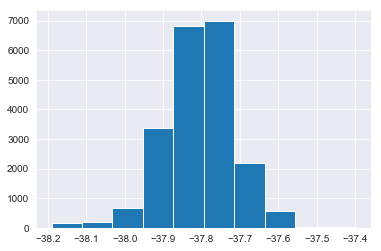

In [25]:
#\import seaborn as sns
#sns.distplot(newdata["Lattitude"], bins=20 )
#sns.plt.show()

plt.hist(data.Lattitude)
plt.show()

In [26]:
data['Lattitude'].max()

-37.3978

In [27]:
data['Lattitude'].min()

-38.19043

In [28]:
data['Lattitude'].mean()

-37.80696302719972

In [29]:
data['Lattitude'].fillna(data['Lattitude'].mean(), inplace=True)
data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-03-12,2.500,3067.000,1.000,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-04-02,2.500,3067.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-04-03,2.500,3067.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
5,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-04-03,2.500,3067.000,2.000,1.000,94.000,nan,nan,Yarra City Council,-37.797,144.997,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-04-06,2.500,3067.000,1.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
10,Abbotsford,129 Charles St,2,h,941000.000,S,Jellis,2016-07-05,2.500,3067.000,1.000,0.000,181.000,nan,nan,Yarra City Council,-37.804,144.995,Northern Metropolitan,4019.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,2016-07-05,2.500,3067.000,2.000,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,2016-08-10,2.500,3067.000,1.000,2.000,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000
15,Abbotsford,217 Langridge St,3,h,1000000.000,S,Jellis,2016-08-10,2.500,3067.000,nan,nan,nan,nan,nan,Yarra City Council,-37.807,nan,Northern Metropolitan,4019.000
16,Abbotsford,18a Mollison St,2,t,745000.000,S,Jellis,2016-08-10,2.500,3067.000,nan,nan,nan,nan,nan,Yarra City Council,-37.807,nan,Northern Metropolitan,4019.000


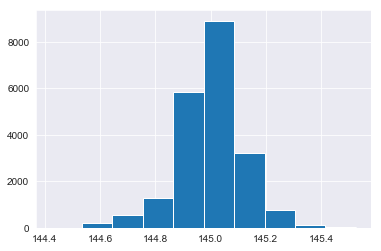

In [30]:
plt.hist(data.Longtitude)
plt.show()

In [31]:
data['Longtitude'].max()
#data
#data.dtypes
#data['Lattitude'].fillna(data['Lattitude'].mean(), inplace=True)
#data.head(10)

145.52635

In [32]:
data['Longtitude'].min()

144.42379

In [33]:
data['Longtitude'].mean()

144.99671101938742

In [34]:
data['Longtitude'].fillna(data['Longtitude'].mean(), inplace=True)
data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-03-12,2.500,3067.000,1.000,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-04-02,2.500,3067.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-04-03,2.500,3067.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
5,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-04-03,2.500,3067.000,2.000,1.000,94.000,nan,nan,Yarra City Council,-37.797,144.997,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-04-06,2.500,3067.000,1.000,2.000,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
10,Abbotsford,129 Charles St,2,h,941000.000,S,Jellis,2016-07-05,2.500,3067.000,1.000,0.000,181.000,nan,nan,Yarra City Council,-37.804,144.995,Northern Metropolitan,4019.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,2016-07-05,2.500,3067.000,2.000,0.000,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,2016-08-10,2.500,3067.000,1.000,2.000,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000
15,Abbotsford,217 Langridge St,3,h,1000000.000,S,Jellis,2016-08-10,2.500,3067.000,nan,nan,nan,nan,nan,Yarra City Council,-37.807,144.997,Northern Metropolitan,4019.000
16,Abbotsford,18a Mollison St,2,t,745000.000,S,Jellis,2016-08-10,2.500,3067.000,nan,nan,nan,nan,nan,Yarra City Council,-37.807,144.997,Northern Metropolitan,4019.000


In [35]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

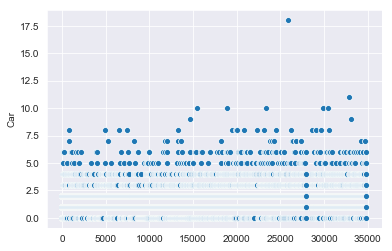

In [36]:
#plt.hist(data.Car)
#plt.show()
import seaborn as sns
sns.scatterplot(x=data.index.values, y=data.Car, data=data)

#data.Car.isnull().sum()
#data.info()
data.Car=data.groupby("Regionname").fillna(data.Car.median())


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-03-12,2.500,3067.000,1.000,2,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-04-02,2.500,3067.000,1.000,2,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-04-03,2.500,3067.000,2.000,3,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
5,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-04-03,2.500,3067.000,2.000,3,94.000,nan,nan,Yarra City Council,-37.797,144.997,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-04-06,2.500,3067.000,1.000,4,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
10,Abbotsford,129 Charles St,2,h,941000.000,S,Jellis,2016-07-05,2.500,3067.000,1.000,2,181.000,nan,nan,Yarra City Council,-37.804,144.995,Northern Metropolitan,4019.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,2016-07-05,2.500,3067.000,2.000,3,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,2016-08-10,2.500,3067.000,1.000,2,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000
15,Abbotsford,217 Langridge St,3,h,1000000.000,S,Jellis,2016-08-10,2.500,3067.000,1.000,3,nan,nan,nan,Yarra City Council,-37.807,144.997,Northern Metropolitan,4019.000
16,Abbotsford,18a Mollison St,2,t,745000.000,S,Jellis,2016-08-10,2.500,3067.000,1.000,2,nan,nan,nan,Yarra City Council,-37.807,144.997,Northern Metropolitan,4019.000


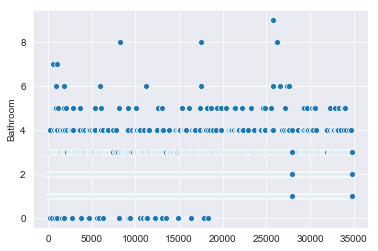

In [37]:
#data.head()

import seaborn as sns
sns.scatterplot(x=data.index.values, y=data.Bathroom, data=data)
data['Bathroom'].fillna(data['Bathroom'].median(), inplace=True)
data
#data.Bathroom=data.groupby("Rooms").fillna(data.Bathroom.median())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,2016-03-12,2.500,3067.000,1.000,2,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,2016-04-02,2.500,3067.000,1.000,2,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,2017-04-03,2.500,3067.000,2.000,3,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000
5,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,2017-04-03,2.500,3067.000,2.000,3,94.000,nan,nan,Yarra City Council,-37.797,144.997,Northern Metropolitan,4019.000
6,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,2016-04-06,2.500,3067.000,1.000,4,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,Northern Metropolitan,4019.000
10,Abbotsford,129 Charles St,2,h,941000.000,S,Jellis,2016-07-05,2.500,3067.000,1.000,2,181.000,nan,nan,Yarra City Council,-37.804,144.995,Northern Metropolitan,4019.000
11,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,2016-07-05,2.500,3067.000,2.000,3,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
14,Abbotsford,98 Charles St,2,h,1636000.000,S,Nelson,2016-08-10,2.500,3067.000,1.000,2,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,Northern Metropolitan,4019.000
15,Abbotsford,217 Langridge St,3,h,1000000.000,S,Jellis,2016-08-10,2.500,3067.000,1.000,3,593.489,nan,nan,Yarra City Council,-37.807,144.997,Northern Metropolitan,4019.000
16,Abbotsford,18a Mollison St,2,t,745000.000,S,Jellis,2016-08-10,2.500,3067.000,1.000,2,593.489,nan,nan,Yarra City Council,-37.807,144.997,Northern Metropolitan,4019.000


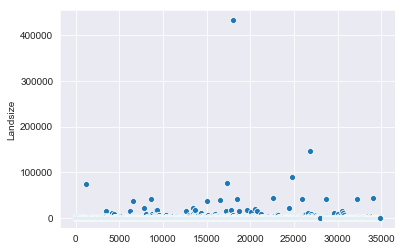

In [38]:
#data.isnull().sum()
#data.head()
sns.scatterplot(x=data.index.values, y=data.Landsize, data=data)
data['Landsize'].fillna(data['Landsize'].mean(), inplace=True)
data.head(10)

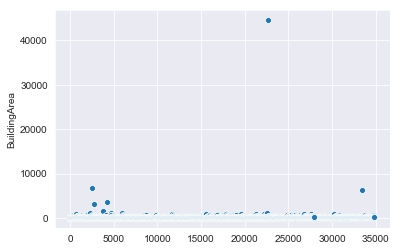

In [39]:
sns.scatterplot(x=data.index.values, y=data.BuildingArea, data=data)
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace=True)

In [40]:
#sns.scatterplot(x=data.index.values, y=data.YearBuilt, data=data)
data['YearBuilt'].median()

1970.0

In [41]:
data['YearBuilt'].fillna(data['YearBuilt'].median(), inplace=True)
data.isnull().sum()
#data.info()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [42]:
data[data['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.000,S,Jellis,2017-04-03,2.300,3051.000,1.000,2,215.000,0.000,2000.000,Melbourne City Council,-37.795,144.944,Northern Metropolitan,6821.000
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.000,S,RT,2017-03-09,9.700,3104.000,3.000,5,743.000,0.000,1949.000,Boroondara City Council,-37.802,145.093,Southern Metropolitan,7809.000
19840,Bundoora,22 Moreton Cr,3,h,814000.000,S,Barry,2017-03-09,12.100,3083.000,1.000,3,542.000,0.000,1970.000,Banyule City Council,-37.709,145.057,Northern Metropolitan,10175.000
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.000,S,Raine,2017-03-09,20.600,3064.000,2.000,4,504.000,0.000,2000.000,Hume City Council,-37.614,144.934,Northern Metropolitan,5833.000
20262,Thornbury,19/337 Station St,3,t,900000.000,VB,Jellis,2017-03-09,7.000,3071.000,2.000,3,120.000,0.000,2000.000,Darebin City Council,-37.763,145.021,Northern Metropolitan,8870.000
21155,Elwood,6/31 Beach Av,2,u,735000.000,S,Buxton,2017-09-16,7.200,3184.000,1.000,2,593.489,0.000,1960.000,Port Phillip City Council,-37.886,144.985,Southern Metropolitan,8989.000
21561,Sunshine West,5 Comino Rd,5,h,720000.000,S,Bells,2017-09-16,10.500,3020.000,2.000,5,593.489,0.000,2010.000,Brimbank City Council,-37.793,144.794,Western Metropolitan,6763.000
21742,Brunswick West,10/13 Peacock St,2,u,461500.000,SP,Jellis,2017-08-19,5.200,3055.000,1.000,2,593.489,0.000,1970.000,Moreland City Council,-37.757,144.940,Northern Metropolitan,7082.000
21858,Essendon,6/4 Balmoral St,2,u,491000.000,S,Barry,2017-08-19,7.500,3040.000,1.000,2,593.489,0.000,1984.000,Moonee Valley City Council,-37.750,144.906,Western Metropolitan,9264.000
21954,Kew,9/910 Glenferrie Rd,2,u,1005000.000,S,Jellis,2017-08-19,5.400,3101.000,1.000,2,593.489,0.000,1965.000,Boroondara City Council,-37.809,145.038,Southern Metropolitan,10331.000


In [43]:
data[data['Landsize']==0]   #After additional research, I determined that a zero land size could be indicative of 'zero-lot-line' homes - residential real estate 
                            #in which the structure comes up to or very near the edge of the property line. 
                            #Therefore, these observations are valid and will remain the data set.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17,Abbotsford,6/241 Nicholson St,1,u,300000.000,S,Biggin,2016-08-10,2.500,3067.000,1.000,1,0.000,156.835,1970.000,Yarra City Council,-37.801,144.997,Northern Metropolitan,4019.000
23,Abbotsford,411/8 Grosvenor St,2,u,700000.000,VB,Jellis,2016-12-11,2.500,3067.000,2.000,2,0.000,156.835,1970.000,Yarra City Council,-37.811,145.007,Northern Metropolitan,4019.000
25,Abbotsford,123/56 Nicholson St,2,u,750000.000,S,Biggin,2016-12-11,2.500,3067.000,2.000,2,0.000,94.000,2009.000,Yarra City Council,-37.808,144.996,Northern Metropolitan,4019.000
29,Abbotsford,7/20 Abbotsford St,1,u,441000.000,SP,Greg,2016-05-14,2.500,3067.000,1.000,1,0.000,156.835,1970.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
40,Abbotsford,13/11 Nicholson St,3,t,900000.000,S,Beller,2017-03-18,2.500,3067.000,2.000,3,0.000,156.835,2010.000,Yarra City Council,-37.809,144.996,Northern Metropolitan,4019.000
42,Abbotsford,6/219 Nicholson St,2,u,500000.000,S,Collins,2016-06-18,2.500,3067.000,1.000,2,0.000,60.000,1970.000,Yarra City Council,-37.801,144.997,Northern Metropolitan,4019.000
48,Abbotsford,5/20 Abbotsford St,1,u,426000.000,SP,Greg,2016-08-22,2.500,3067.000,1.000,1,0.000,156.835,1970.000,Yarra City Council,-37.802,144.999,Northern Metropolitan,4019.000
50,Abbotsford,116/56 Nicholson St,1,u,457000.000,S,Jellis,2016-08-22,2.500,3067.000,1.000,1,0.000,50.000,1970.000,Yarra City Council,-37.808,144.996,Northern Metropolitan,4019.000
53,Abbotsford,31 Turner St,4,h,1542000.000,S,Collins,2016-09-24,2.500,3067.000,3.000,4,0.000,156.835,1970.000,Yarra City Council,-37.799,144.996,Northern Metropolitan,4019.000
57,Abbotsford,11/205 Gipps St,1,u,470000.000,S,Nelson,2016-07-26,2.500,3067.000,1.000,1,0.000,50.000,2013.000,Yarra City Council,-37.806,144.996,Northern Metropolitan,4019.000


In [44]:
data = data[data['BuildingArea']!=0]  # remove outlier
data.describe()  # confirm removal

# the observation with a 'zero' BuildingArea will be removed because 
#it is not possible for a home to have a size of zero. Also, this observation is priced usually high .

,Rooms,Price,Distance,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27183.000,27183.000,27183.000,27183.000,27183.000,27183.000,27183.000,27183.000,27183.000,27183.000
mean,2.992,1050166.745,11.276,1.451,593.471,157.187,1968.485,-37.807,144.997,7565.627
std,0.955,641441.746,6.785,0.662,3055.733,281.155,24.521,0.080,0.106,4493.156
min,1.000,85000.000,0.000,0.000,0.000,1.000,1196.000,-38.190,144.424,83.000
25%,2.000,635000.000,6.400,1.000,351.000,156.835,1970.000,-37.843,144.954,4294.000
50%,3.000,870000.000,10.400,1.000,593.489,156.835,1970.000,-37.807,144.997,6567.000
75%,4.000,1295000.000,14.000,2.000,593.489,156.835,1970.000,-37.766,145.048,10412.000
max,16.000,11200000.000,48.100,9.000,433014.000,44515.000,2019.000,-37.398,145.526,21650.000


C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


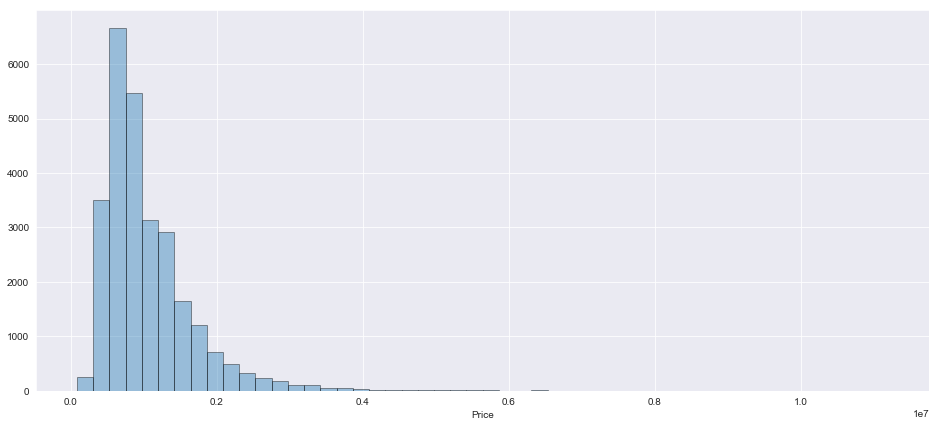

In [45]:
plt.figure(figsize=(16,7))
sns.distplot(data['Price'], kde = False,hist_kws=dict(edgecolor="k"))

In [46]:
data.select_dtypes(['category']).columns  #identify categorical features

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname'],
      dtype='object')

In [47]:
# abbreviate Regionname categories
data['Regionname'] = data['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

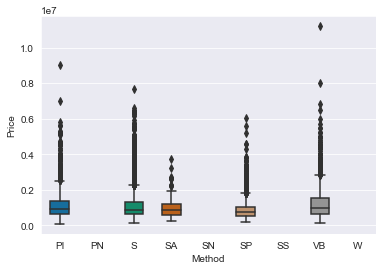

In [48]:
bplot1=sns.boxplot(y='Price', x='Method',
                  data=data,
                  width=0.5,
                  palette='colorblind')

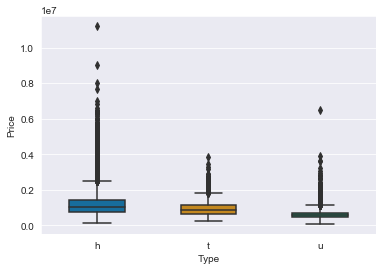

In [50]:
bplot2= sns.boxplot(y='Price', x='Type', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

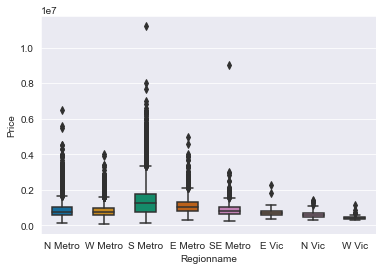

In [51]:
bplot3= sns.boxplot(y='Price', x='Regionname', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

In [52]:
data.select_dtypes(['float64','int64']).columns # identify numeric features

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

Text(0.5, 1.0, 'Rooms vs Price')

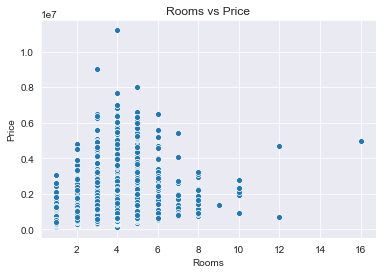

In [53]:
ax = sns.scatterplot(x="Rooms", y="Price", data=data)
ax.set_title("Rooms vs Price")

Text(0.5, 1.0, 'Distance vs Price')

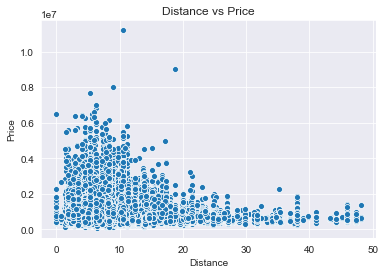

In [54]:
ax = sns.scatterplot(x="Distance", y="Price", data=data)
ax.set_title("Distance vs Price")

Text(0.5, 1.0, 'Bathroom vs Price')

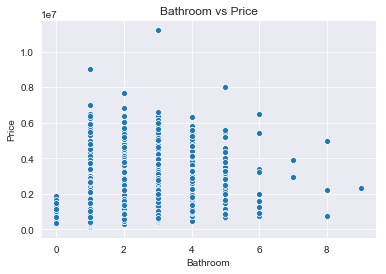

In [55]:
ax = sns.scatterplot(x="Bathroom", y="Price", data=data)
ax.set_title("Bathroom vs Price")

Text(0.5, 1.0, 'Car vs Price')

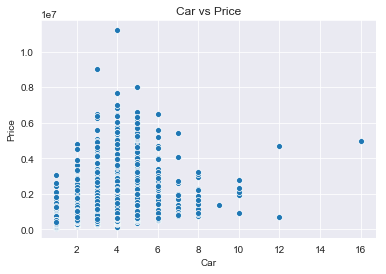

In [56]:
ax = sns.scatterplot(x="Car", y="Price", data=data)
ax.set_title("Car vs Price")

Text(0.5, 1.0, 'Landsize vs Price')

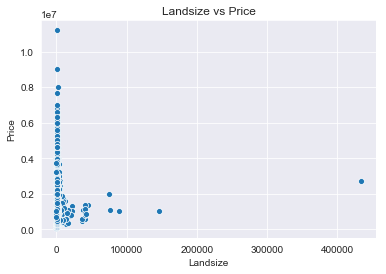

In [57]:
ax = sns.scatterplot(x="Landsize", y="Price", data=data)
ax.set_title("Landsize vs Price")

Text(0.5, 1.0, 'BuildingArea vs Price')

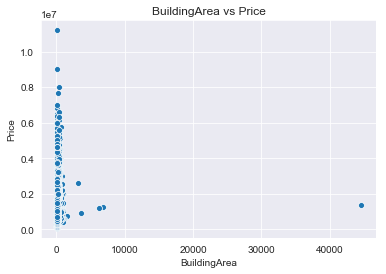

In [58]:
ax = sns.scatterplot(x="BuildingArea", y="Price", data=data)
ax.set_title("BuildingArea vs Price")

Text(0.5, 1.0, 'Propertycount vs Price')

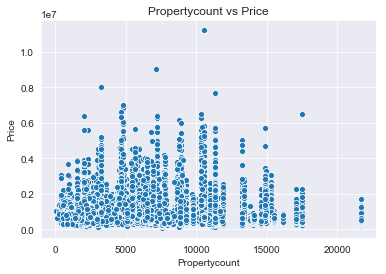

In [59]:
ax = sns.scatterplot(x="Propertycount", y="Price", data=data)
ax.set_title("Propertycount vs Price")

Text(0.5, 1.0, 'Variable Correlation')

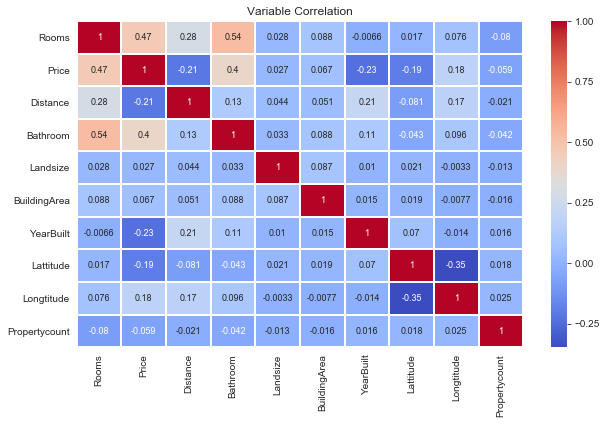

In [60]:
#data
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')



 mu = 1050166.75 and sigma = 641429.95



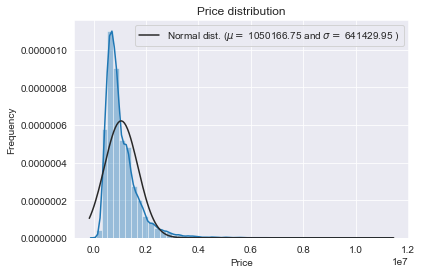

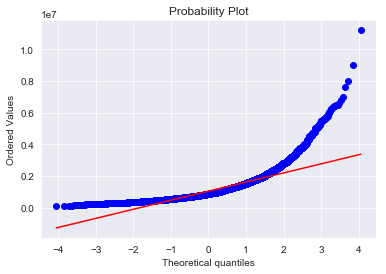

In [61]:
#here again we see our target variable Price distribution and if any skewness there 
#so try to transform it in normal distribution form 

sns.distplot(data['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)
plt.show()

In [61]:
#data["Price_log"] = np.log1p(data["Price"])
#data["Price_antilog"] = np.expm1(data["Price_log"])

#print(data["Price_log"].head(),data["Price_antilog"].head(),data.Price.head())

1   14.208
2   13.850
4   14.197
5   13.653
6   14.286
Name: Price_log, dtype: float64 1   1480000.000
2   1035000.000
4   1465000.000
5    850000.000
6   1600000.000
Name: Price_antilog, dtype: float64 1   1480000.000
2   1035000.000
4   1465000.000
5    850000.000
6   1600000.000
Name: Price, dtype: float64



 mu = 13.72 and sigma = 0.52



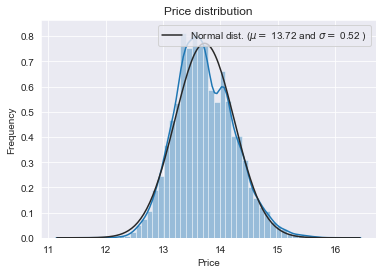

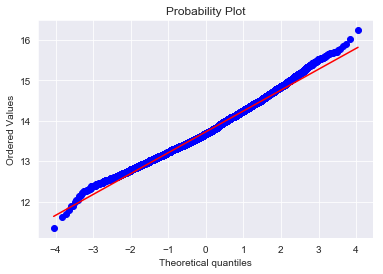

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,14.208,S,Biggin,2016-03-12,2.500,3067.000,1.000,2,202.000,156.835,1970.000,Yarra City Council,-37.800,144.998,N Metro,4019.000
2,Abbotsford,25 Bloomburg St,2,h,13.850,S,Biggin,2016-04-02,2.500,3067.000,1.000,2,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,N Metro,4019.000
4,Abbotsford,5 Charles St,3,h,14.197,SP,Biggin,2017-04-03,2.500,3067.000,2.000,3,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,N Metro,4019.000
5,Abbotsford,40 Federation La,3,h,13.653,PI,Biggin,2017-04-03,2.500,3067.000,2.000,3,94.000,156.835,1970.000,Yarra City Council,-37.797,144.997,N Metro,4019.000
6,Abbotsford,55a Park St,4,h,14.286,VB,Nelson,2016-04-06,2.500,3067.000,1.000,4,120.000,142.000,2014.000,Yarra City Council,-37.807,144.994,N Metro,4019.000
10,Abbotsford,129 Charles St,2,h,13.755,S,Jellis,2016-07-05,2.500,3067.000,1.000,2,181.000,156.835,1970.000,Yarra City Council,-37.804,144.995,N Metro,4019.000
11,Abbotsford,124 Yarra St,3,h,14.445,S,Nelson,2016-07-05,2.500,3067.000,2.000,3,245.000,210.000,1910.000,Yarra City Council,-37.802,144.999,N Metro,4019.000
14,Abbotsford,98 Charles St,2,h,14.308,S,Nelson,2016-08-10,2.500,3067.000,1.000,2,256.000,107.000,1890.000,Yarra City Council,-37.806,144.995,N Metro,4019.000
15,Abbotsford,217 Langridge St,3,h,13.816,S,Jellis,2016-08-10,2.500,3067.000,1.000,3,593.489,156.835,1970.000,Yarra City Council,-37.807,144.997,N Metro,4019.000
16,Abbotsford,18a Mollison St,2,t,13.521,S,Jellis,2016-08-10,2.500,3067.000,1.000,2,593.489,156.835,1970.000,Yarra City Council,-37.807,144.997,N Metro,4019.000


In [62]:
#Log-transformation of the target variable

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["Price"] = np.log1p(data["Price"])

#Check the new distribution 
sns.distplot(data['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)
plt.show()

data

In [63]:
# Region Column Anaalysis
df= data.copy()
df['Regionname'].unique()

array(['N Metro', 'W Metro', 'S Metro', 'E Metro', 'SE Metro', 'E Vic',
       'N Vic', 'W Vic'], dtype=object)

In [64]:
df['Regionname'].isnull().sum()

0

In [65]:
df['Regionname'].value_counts()

S Metro     8504
N Metro     7835
W Metro     5809
E Metro     3269
SE Metro    1339
N Vic        166
E Vic        165
W Vic         96
Name: Regionname, dtype: int64

In [66]:
regionname_dummies = pd.get_dummies(df['Regionname'])
regionname_dummies.head()

,E Metro,E Vic,N Metro,N Vic,S Metro,SE Metro,W Metro,W Vic
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0


In [67]:
df = pd.concat([df, regionname_dummies], axis = 1)
df = df.drop(['Regionname'], axis = 1)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Longtitude,Propertycount,E Metro,E Vic,N Metro,N Vic,S Metro,SE Metro,W Metro,W Vic
1,Abbotsford,85 Turner St,2,h,14.208,S,Biggin,2016-03-12,2.500,3067.000,...,144.998,4019.000,0,0,1,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,h,13.850,S,Biggin,2016-04-02,2.500,3067.000,...,144.993,4019.000,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,h,14.197,SP,Biggin,2017-04-03,2.500,3067.000,...,144.994,4019.000,0,0,1,0,0,0,0,0
5,Abbotsford,40 Federation La,3,h,13.653,PI,Biggin,2017-04-03,2.500,3067.000,...,144.997,4019.000,0,0,1,0,0,0,0,0
6,Abbotsford,55a Park St,4,h,14.286,VB,Nelson,2016-04-06,2.500,3067.000,...,144.994,4019.000,0,0,1,0,0,0,0,0


In [68]:
# Type Column Analysis
df['Type'].isnull().sum()
df['Type'].unique()

[h, t, u]
Categories (3, object): [h, t, u]

In [69]:
type_dummies = pd.get_dummies(df['Type'])
type_dummies

,h,t,u
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
10,1,0,0
11,1,0,0
14,1,0,0
15,1,0,0
16,0,1,0


In [70]:
type_dummies.sum()

h    18421
t     2861
u     5901
dtype: int64

In [71]:
#So,'h' is the most seen value, we'll remove it and consider as the default value, again
# avoiding multicollinearity
type_dummies = type_dummies.drop(['h'], axis = 1)

In [72]:
df = pd.concat([df, type_dummies], axis = 1)
df = df.drop(['Type'], axis = 1)
df.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,E Metro,E Vic,N Metro,N Vic,S Metro,SE Metro,W Metro,W Vic,t,u
1,Abbotsford,85 Turner St,2,14.208,S,Biggin,2016-03-12,2.500,3067.000,1.000,...,0,0,1,0,0,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,13.850,S,Biggin,2016-04-02,2.500,3067.000,1.000,...,0,0,1,0,0,0,0,0,0,0
4,Abbotsford,5 Charles St,3,14.197,SP,Biggin,2017-04-03,2.500,3067.000,2.000,...,0,0,1,0,0,0,0,0,0,0
5,Abbotsford,40 Federation La,3,13.653,PI,Biggin,2017-04-03,2.500,3067.000,2.000,...,0,0,1,0,0,0,0,0,0,0
6,Abbotsford,55a Park St,4,14.286,VB,Nelson,2016-04-06,2.500,3067.000,1.000,...,0,0,1,0,0,0,0,0,0,0


In [73]:
# identify numeric features
#df.dtypes
df.columns.values

array(['Suburb', 'Address', 'Rooms', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Propertycount', 'E Metro', 'E Vic', 'N Metro',
       'N Vic', 'S Metro', 'SE Metro', 'W Metro', 'W Vic', 't', 'u'],
      dtype=object)

In [74]:
columns_of_interest = ['Rooms','Price','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt',
                       'Lattitude','Longtitude','Propertycount','E Metro', 'E Vic', 'N Metro',
                       'N Vic', 'S Metro', 'SE Metro', 'W Metro', 'W Vic', 't', 'u']
df=df[columns_of_interest]
df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,E Metro,E Vic,N Metro,N Vic,S Metro,SE Metro,W Metro,W Vic,t,u
1,2,14.208,2.500,1.000,2,202.000,156.835,1970.000,-37.800,144.998,...,0,0,1,0,0,0,0,0,0,0
2,2,13.850,2.500,1.000,2,156.000,79.000,1900.000,-37.808,144.993,...,0,0,1,0,0,0,0,0,0,0
4,3,14.197,2.500,2.000,3,134.000,150.000,1900.000,-37.809,144.994,...,0,0,1,0,0,0,0,0,0,0
5,3,13.653,2.500,2.000,3,94.000,156.835,1970.000,-37.797,144.997,...,0,0,1,0,0,0,0,0,0,0
6,4,14.286,2.500,1.000,4,120.000,142.000,2014.000,-37.807,144.994,...,0,0,1,0,0,0,0,0,0,0


In [75]:
#df.shape
# Split
# Create features variable 
X =df[ ['Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt',
                       'Lattitude','Longtitude','Propertycount','E Metro', 'E Vic', 'N Metro',
                       'N Vic', 'S Metro', 'SE Metro', 'W Metro', 'W Vic', 't', 'u']]

# Create target variable
y = df['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [76]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
model = LinearRegression()

# Fit model to training data
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
# Predict
# Predicting test set results
y_pred = model.predict(X_test)
y_pred = np.expm1(y_pred)
y_pred



array([ 530776.09770858, 1551302.1196844 ,  793926.2778903 , ...,
       1316960.51341706, 1199656.76177396, 1639663.97899715])

In [78]:
y_test = np.expm1(y_test)
y_test

29334    340000.000
26144   1479000.000
7794     850000.000
16265    860000.000
19732    601000.000
11619    975000.000
10779    520000.000
3674    1350000.000
29718   1151000.000
17345    645000.000
31754    900000.000
8353     400000.000
34565    895000.000
28580    460000.000
28277    460000.000
13259   1240000.000
21890   1300000.000
3769     820000.000
17010   3900000.000
22620    853000.000
24040    696000.000
23887    790000.000
20704   1150000.000
31743   1595000.000
26266    865000.000
32561    645000.000
13102    468000.000
5758     710000.000
8964     827500.000
869     2800000.000
            ...    
183     2140000.000
22557    950000.000
7973    1182500.000
27008   1095000.000
15231    465000.000
25526    840000.000
10471    705000.000
18623   1425000.000
25577   1470000.000
3211    1270000.000
16966   1141000.000
7778    1240000.000
29566    850000.000
29796    797000.000
20121   1450000.000
19933    881017.000
23006    350000.000
5035    2880000.000
22693   1400000.000


In [79]:
# score it
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 238661.15223934758
MSE: 169216760304.02222
RMSE: 411359.6483662711


In [80]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5983849533188649


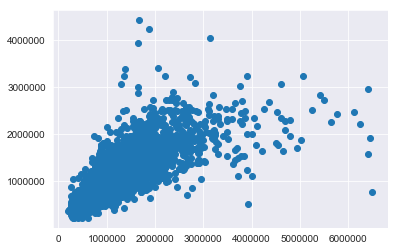

In [81]:
#Analyze the Residuals
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

In [82]:
y_pred



array([ 530776.09770858, 1551302.1196844 ,  793926.2778903 , ...,
       1316960.51341706, 1199656.76177396, 1639663.97899715])

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


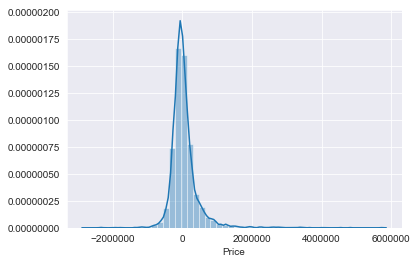

In [83]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

In [85]:
# Interpreting the Cofficients
cdf = pd.DataFrame(data = model.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,0.099
Distance,-0.035
Bathroom,0.084
Car,0.099
Landsize,0.000
BuildingArea,0.000
YearBuilt,-0.002
Lattitude,-0.522
Longtitude,0.290
Propertycount,-0.000
